<a href="https://colab.research.google.com/github/sepidehrezvani/Shabake_Mokhaberati/blob/main/CRC_Simulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install crcmod

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.7/89.7 kB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for crcmod: filename=crcmod-1.7-cp312-cp312-linux_x86_64.whl size=31831 sha256=85798e742ca8f6668272e866f423b3440ddf997fac15fce9a9355ee8fb69b4ff
  Stored in directory: /root/.cache/pip/wheels/76/08/0b/caa8b1380122cbfe6a03eaccbec0f63c67e619af4e30ca5e2a
Successfully built crcmod


Data: 11010011101100  | Generator: 1101  | CRC: 110
Data: 11010011101100  | Generator: 1011  | CRC: 100
Data: 11010011101100  | Generator: 10011  | CRC: 1011
Data: 1011011  | Generator: 1101  | CRC: 001
Data: 1011011  | Generator: 1011  | CRC: 101
Data: 1011011  | Generator: 10011  | CRC: 1100
Data: 1110001  | Generator: 1101  | CRC: 010
Data: 1110001  | Generator: 1011  | CRC: 100
Data: 1110001  | Generator: 10011  | CRC: 1011


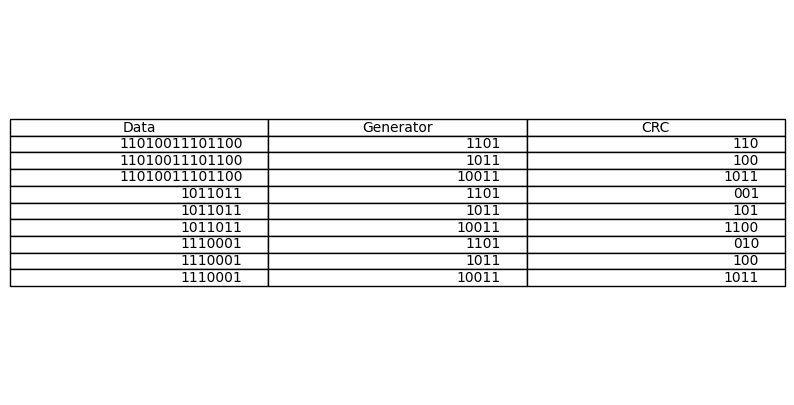

In [2]:
# CRC Simulation in Python (for Jupyter / Colab)
import numpy as np
import matplotlib.pyplot as plt

# Function to perform CRC calculation
def crc_encode(data, generator):
    """Encode data using CRC with given generator polynomial"""
    data = list(map(int, data))
    gen = list(map(int, generator))
    # Append zeros to data
    data += [0]*(len(gen)-1)
    # Copy of data for division
    tmp = data[:]
    for i in range(len(data)-len(gen)+1):
        if tmp[i] == 1:
            for j in range(len(gen)):
                tmp[i+j] ^= gen[j]
    # CRC is remainder
    crc = tmp[-(len(gen)-1):]
    return crc

# Example data
data_list = ['11010011101100', '1011011', '1110001']
generators = ['1101', '1011', '10011']  # Different CRC polynomials

results = []

for data in data_list:
    for gen in generators:
        crc = crc_encode(data, gen)
        results.append((data, gen, ''.join(map(str, crc))))

# Display results
for r in results:
    print(f"Data: {r[0]}  | Generator: {r[1]}  | CRC: {r[2]}")

# Optional: Save results as image for GitHub visualization
plt.figure(figsize=(10,5))
plt.axis('off')
table_data = [[r[0], r[1], r[2]] for r in results]
plt.table(cellText=table_data, colLabels=['Data', 'Generator', 'CRC'], loc='center')
plt.savefig("crc_results.png")
plt.show()